# Классификатор на основе датасета Fashion-MNIST

In [136]:
!pip install -U tensorflow_datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [137]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow as tf
import tensorflow_datasets as tfds
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
import math
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

print(tf.__version__)


2.12.0


##Импортируем набор данных Fashion MNIST

In [138]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Сохраняем наименования классов для дальнейшего использования:

In [139]:
class_names = ['Футболка / топ', "Шорты", "Свитер", "Платье",
              "Плащ", "Сандали", "Рубашка", "Кроссовок", "Сумка",
              "Ботинок"]

### Исследуем данные

Отображаем количество тренировочных и тестовых экземпляров:

In [140]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print('Количество тренировочных экземпляров: {}'.format(num_train_examples))
print('Количество тестовых экземпляров: {}'.format(num_test_examples))

Количество тренировочных экземпляров: 60000
Количество тестовых экземпляров: 10000


## Предобрабатываем данные

Реализуем функцию нормализациии и применяем её к каждому изображению в тренировочных и тестовых наборах данных.

In [141]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels


# метод map применяет функцию нормализации к каждому элементу в массиве
# тестовых и тренировочных наборах данных
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

# Изучаем обработанные данные

Отрисовываем первые 20 изображений из тренировочного набора данных

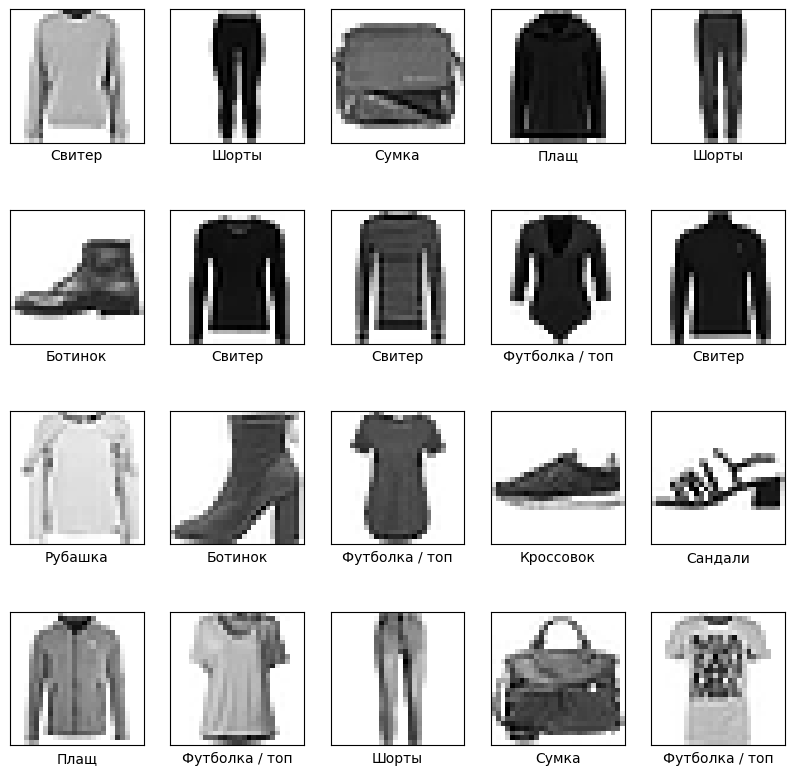

In [142]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(train_dataset.take(20)):
    image = image.numpy().reshape((28,28))
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
plt.show()

#Строим модель 

###Настраиваем слои

In [143]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

###Компилируем модель

In [144]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])

## Тренируем модель

In [145]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)



In [146]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 16s 4ms/step - loss: 0.4968 - accuracy: 0.8235
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3741 - accuracy: 0.8652
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3330 - accuracy: 0.8797
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3060 - accuracy: 0.8877
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2919 - accuracy: 0.8919


### Проверяем точность

In [147]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/BATCH_SIZE))
print("Точность на тестовом наборе данных: ", test_accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 0.3562 - accuracy: 0.8721
Точность на тестовом наборе данных:  0.8720999956130981


## Предсказываем


Воспользуемся обученной моделью для получения предсказаний по некоторым изображениям:

In [148]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

1/1 [==============================] - 0s 64ms/step


In [149]:
predicted_classes = model.predict(test_dataset)
predicted_classes = np.argmax(predicted_classes, axis=1)


313/313 [==============================] - 1s 3ms/step


In [150]:
predicted_classes

array([4, 4, 9, ..., 3, 6, 1])

In [135]:
import pandas as pd
import datetime 

In [153]:
df_submission = pd.DataFrame(predicted_classes)
df_submission.to_csv('submission.csv', sep=',')

In [155]:
df = pd.read_csv('submission.csv')

In [156]:
df.columns

Index(['Unnamed: 0', '0'], dtype='object')

In [157]:
df.columns = ['Id', 'Category']

In [161]:
gh = df

In [163]:
gh.to_csv('submission12.csv')


In [166]:
from google.colab import files
files.download(f"./submission12.csv") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>